In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
SincP = 0.5

# source output
def wsrc(t):
    return np.sinc(SincP*t)

# helper functions
def dist(src,x,y):
    (x0,y0) = src
    return np.sqrt((x0-x)**2+(y0-y)**2)

def dist_obj(src,obj,x,y):
    (x0,y0) = src
    (x1,y1) = obj
    return np.sqrt((x0-x1)**2+(y0-y1)**2)+np.sqrt((x1-x)**2+(y1-y)**2)

In [172]:
class Setup():
    def __init__(self,src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch):
        self.src = src
        self.obstacle = obstacle
        self.Nmics = Nmics
        self.Nsamp = Nsamp
        self.dist_per_samp = dist_per_samp
        self.C = C
        self.pitch = pitch
        
        self.find_mic_positions()
    
    def find_mic_positions(self):
        self.mics = []
        for n in range(self.Nmics):
            self.mics.append(self.pitch/2 + (n-self.Nmics/2)*self.pitch)
        self.mics = np.array(self.mics)

    def find_mic_data(self):
        self.mic_data = np.zeros((self.Nmics,1))
        tsamp = 0
        tmics = dist(self.src,0,self.mics)/(self.C)
        tmics2 = dist_obj(self.src,self.obstacle,0,self.mics)/(self.C)
    
        while tsamp < self.Nsamp:
            # tmics2 = dist_obj(self.src,(1,1),0,self.mics)/(self.C)
            
            # zmic =  wsrc(tsamp*self.dist_per_samp/self.C-tmics)
            # zmic =  wsrc(tsamp-tmics)
            zmic =  wsrc(tsamp*self.dist_per_samp/self.C-tmics2)
            
            zmic = zmic.reshape(-1,1)
            self.mic_data = np.hstack((self.mic_data,zmic))
            
            tsamp += 1
            
        self.mic_data = np.delete(self.mic_data,0, axis=1)

    def plot_mic_data(self):
        y = np.arange(Nmics)
        x = np.arange(Nsamp)
        print(Nsamp)
        z = self.mic_data
        plt.imshow(z,cmap='plasma',aspect='equal',extent=(x.min(), x.max(), y.min(), y.max()))

    def digital_output(self,mic_data, d):
        i = ((d/(self.dist_per_samp)).astype(int))%self.Nsamp
        return mic_data[i]
        
    def DAS(self, mic_data, xmax=5,ymax=5,resolution=200, display=True):
        self.xRES, self.yRES = resolution,resolution
        self.xMAX = xmax
        self.xMIN = 0
        self.yMAX = ymax
        self.yMIN = -ymax
        self.xSTEP = (self.xMAX-self.xMIN)/self.xRES
        self.ySTEP = (self.yMAX-self.yMIN)/self.yRES
        
        tsamp = 0
        x = np.arange(self.xMIN,self.xMAX,self.xSTEP)
        y = np.arange(self.yMIN,self.yMAX,self.ySTEP)
        
        Nmics, Nsamp = mic_data.shape

        X, Y = np.meshgrid(x, y)
        
        z = np.full((self.xRES,self.yRES),0, dtype=np.float64)

        for i in range(Nmics):
            d = dist((0,self.mics[i]), X, Y)
            z += self.digital_output(mic_data[i], d)

        self.das = z

        mx_ind = np.unravel_index(np.argmax(z), z.shape) 
        print(mx_ind[1]*self.xSTEP-abs(self.xMIN),mx_ind[0]*self.ySTEP-abs(self.yMAX))
    
    def plot_DAS(self):
        a = 1
        plt.imshow(self.das,cmap='plasma',aspect='equal',extent=(self.xMIN, self.xMAX, self.yMIN*a, self.yMAX*a))
        plt.colorbar()
        

In [173]:
Nmics = 64
Nsamp = 100
src = (0,0)
obstacle = (3,3)
C = 0.5

dist_per_samp = 0.5
pitch = 0.1

100


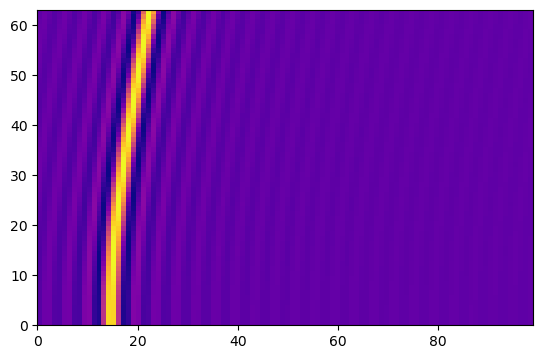

In [174]:
setup = Setup(src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch)
setup.find_mic_data()
setup.plot_mic_data()

6.5 6.0


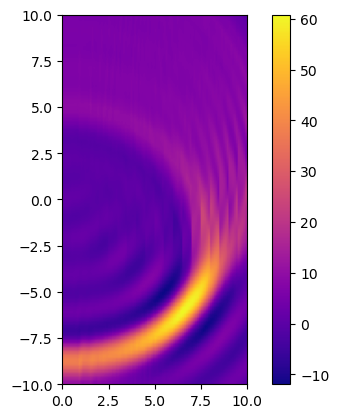

In [176]:
setup.DAS(setup.mic_data,xmax=10,ymax=10,resolution=100)
setup.plot_DAS()

In [177]:
Nmics = 64
Nsamp = 100
src = (0,0)
obstacle = (3,-1)
C = 2.0

dist_per_samp = 0.1
pitch = 0.1

200


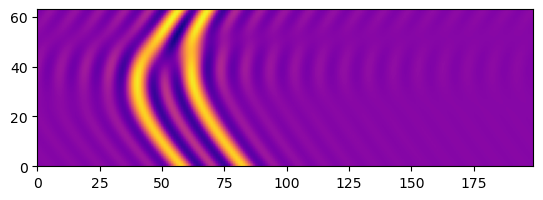

In [178]:
src = (0,0)
obstacle = (3,-1)
C = 0.5

dist_per_samp = 0.1
pitch = 0.1
rx2 = np.loadtxt('rx2.txt')
Nmics, Nsamp = rx2.shape

setup = Setup(src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch)
setup.mic_data = rx2
setup.plot_mic_data()

6.300000000000001 -1.6999999999999997


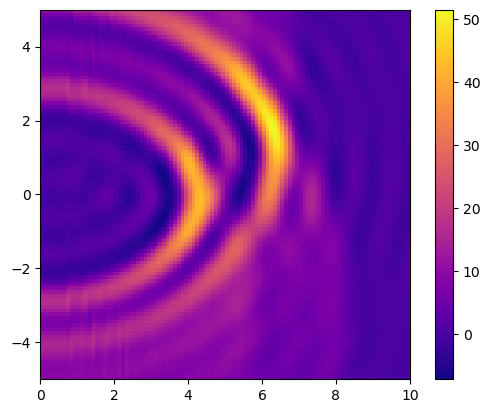

In [179]:
setup.DAS(setup.mic_data, xmax=10,ymax=5,resolution=100)
setup.plot_DAS()